## Various type of TS

### 1) Univariate Time Series

A univariate time series, is a series with a single time-dependent variable like Demand for a product at time, t.

For example, have a look at the sample dataset below that consists of the minimum temperatures across the months of the year from the Southern Hemisphere from 1981 to 1990. Here, temperature is the dependent variable (dependent on Time).

In [3]:
### Load required libraries

from    pandas             import   read_csv, Grouper, DataFrame, concat
import  matplotlib.pyplot  as       plt


In [4]:
### Read the time series data

series   =  read_csv('E:/AIMLGLIM/TIME_SERIES_FORECASTING/week1/daily-minimum-temperatures.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

In [5]:
### Print first five records

print(series.head())

Date
1981-01-01    20.7
1981-02-01    17.9
1981-03-01    18.8
1981-04-01    14.6
1981-05-01    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: object


#### Plot the time series data to detect patterns

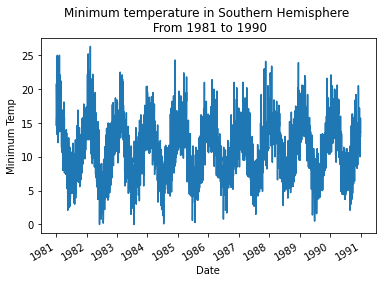

In [4]:
series.plot()
plt.ylabel('Minimum Temp')
plt.title('Minimum temperature in Southern Hemisphere \n From 1981 to 1990')
plt.show()

Suppose we predict the temperature for the next few months, we will look at the past values and try to gauge and extract a pattern. 

Here we observe a pattern within each year indicating a seasonal effect. Such observations will help us in predicting future values. 

**Note: We have used only one variable, Temp (the temperature of the past 19 years).**

Hence, this is called Univariate Time Series Analysis/Forecasting.

 ### Multi-variate Time Series

A Multivariate time series has more than one time-dependent variable. Each variable depends not only on its past values but also has some dependency on other variables. This dependency is used for forecasting future values.
https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

Air pollution forecasting

https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

This dataset reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.
The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. 

The complete feature list in the raw data is as follows:

| Sl No | Variable | Description |
| --- | --------------- | ------------------------------ |
| 1 | No | row number | 
| 2 | qyear | year of data in this row | 
| 3 | month | month of data in this row | 
| 4 | day | day of data in this row | 
| 5 | hour | hour of data in this row | 
| 6 | pm2.5 | PM2.5 concentration | 
| 7 | DEWP | Dew Point | 
| 8 | TEMP | Temperature | 
| 9 | PRES | Pressure | 
| 10 | cbwd | Combined wind direction | 
| 11 | Iws | Cumulated wind speed | 
| 12 | Is | Cumulated hours of snow | 
| 13 | Ir | Cumulated hours of rain | 


**Given the weather conditions and pollution for prior hours, we forecast the pollution at the next hour.**

* 1) Consolidate the date-time information into a single date-time so that we can use it as an index in Pandas.
* 2) Treat NA values. 

A quick check reveals NA values for pm2.5 for the first 24 hours. We will, therefore, need to remove the first row of data. There are also a few scattered “NA” values later in the dataset; we can mark them with 0 values for now.

* 1) Load the raw dataset and parses the date-time information as the Pandas DataFrame index. 
* 2) Drop the “No” column 
* 3) Name each column. 
* 4) Replace NA values with “0” 
* 5) Remove first 24 hours.

In [5]:
from pandas import read_csv
from datetime import datetime

# load libraries

#The following lines of code defines a function which goes by the name of 'parse'. This particular function sets ups the
#the date time reading format
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

# Load dataset

dataset = read_csv('D:/raw.csv',  parse_dates = [['year', 'month', 'day', 'hour']],
                   index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)

# manually specify column names

dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'

# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)

# drop the first 24 hours
dataset = dataset[24:]

# summarize first 5 rows
print(dataset.head(5))

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


 Plot each series as a separate subplot, except wind speed dir, which is categorical.

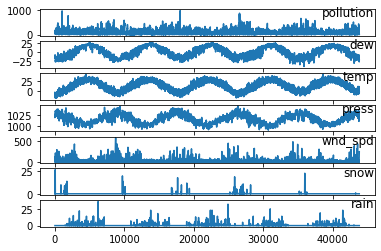

In [6]:
values = dataset.values

# specify columns to plot

groups = [0, 1, 2, 3, 5, 6, 7]
i = 1

# plot each column
plt.figure()

for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
    
plt.show()

We have created a plot with 7 subplots showing the 5 years of data for each variable.

## Reading and saving TS objects in Python

### Example 1 

#### Use US Airpassengers data set

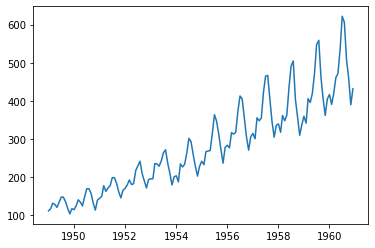

In [7]:
from     pandas            import  read_csv, DataFrame, concat, Grouper
import   pandas            as      pd
import   matplotlib.pyplot as      plt

# We are defining the way that Python should be reading our corresponding time-stamps in the data. In this case, first 
# Year and then Month. the following arguement can be passed into the 'date_parser' parser parameter present inside the
# 'read_csv' function of pandas
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

data      =   pd.read_csv('D:/AirPassenger.csv', parse_dates = ['Year-Month'], index_col = 'Year-Month')
plt.plot(data) 
plt.show()

Some of the arguments for read_csv are explained here.

* parse_dates:     This specifies the column which contains the date-time information. 
* index_col:       A key idea behind using Pandas for TS data is that the index has to be the variable depicting date-time information. 
* date_parser:    This specifies a function which converts an input string into datetime variable. Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, the format has to be manually defined. 


In [8]:
### Save the TS object 
series.to_csv('ts1.csv', index = True, sep = ',')

### Check the object retrieved
series1 = read_csv('ts1.csv', header = 0)

### Check
print(type(series1))
print(series1.head(2).T)

<class 'pandas.core.frame.DataFrame'>
               0           1
Date  1981-01-01  1981-01-02
Temp        20.7        17.9


### Example 2

Read GDP India series and save this TS object using python.
Data is yearly from 1960-1-1 to 2017-12-31.

https://pythontips.com/2013/08/02/what-is-pickle-in-python/

Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. 

Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

Now we store the TS object and retrieve the same from the pickle object.

In [9]:
IndiaGDP = pd.read_csv('D:/GDPIndia.csv', header=0)

date_rng = pd.date_range(start='1/1/1960', end='31/12/2017', freq='A')

IndiaGDP['TimeIndex'] = pd.DataFrame(date_rng, columns=['Year'])
IndiaGDP.head(5).T

,0,1,2,3,4
Year,1960,1961,1962,1963,1964
GDPpercapita,81.2848,84.4264,88.9149,100.049,114.315
TimeIndex,1960-12-31 00:00:00,1961-12-31 00:00:00,1962-12-31 00:00:00,1963-12-31 00:00:00,1964-12-31 00:00:00


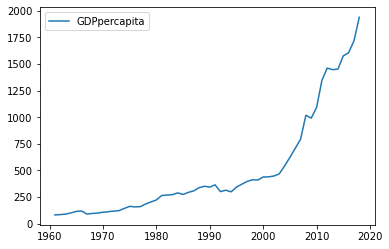

In [10]:
plt.plot(IndiaGDP.TimeIndex, IndiaGDP.GDPpercapita,label='GDPpercapita')
plt.legend(loc='best')
plt.show()

In [11]:
### Load as a pickle object

import pickle

with open('GDPIndia.obj', 'wb') as fp:
        pickle.dump(IndiaGDP, fp)

In [12]:
### Retrieve the pickle object

with open('GDPIndia.obj', 'rb') as fp:  
     IndiaGDP1 = pickle.load(fp)
        
IndiaGDP1.head(5).T

,0,1,2,3,4
Year,1960,1961,1962,1963,1964
GDPpercapita,81.2848,84.4264,88.9149,100.049,114.315
TimeIndex,1960-12-31 00:00:00,1961-12-31 00:00:00,1962-12-31 00:00:00,1963-12-31 00:00:00,1964-12-31 00:00:00


If you are facing further problems with the 'pickle' function in Python, please do refer to the following documentation over $\href{https://docs.python.org/2/library/pickle.html}{here}$.

### Components of TS: Trend & Seasonality

### Example 3

**Shampoo Sales Dataset**

This dataset describes the monthly number of sales of shampoo over a 3 year period.
The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright, and Hyndman (1998).

Data source: Data Market https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period


Below is a sample of the first 5 rows of data, including the header row.

| Month | Sales |
| ---- | -------- |
| 1-01 | 266.0 | 
| 1-02 | 145.9 | 
| 1-03 | 183.1 | 
| 1-04 | 119.3 | 
| 1-05 | 180.3 | 

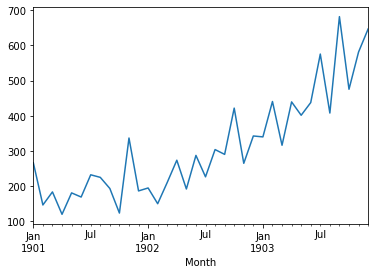

In [13]:
import  pandas            as pd
import  matplotlib.pyplot as plt
 
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('D:/shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

series.plot()
plt.show()

### The above plot shows an increasing trend.

### Exercise 4

**Minimum Daily Temperatures Dataset**

https://machinelearningmastery.com/time-series-seasonality-with-python/

This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

Data source: Data Market https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period

The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

A sample of the first 5 rows of data, including the header row is shown below:

| Date | Temperature |
| ------- | -------- | 
| 1981-01-01 | 20.7 | 
| 1981-01-02 | 17.9 | 
| 1981-01-03 | 18.8 | 
| 1981-01-04 | 14.6 | 
| 1981-01-05 | 15.8 | 


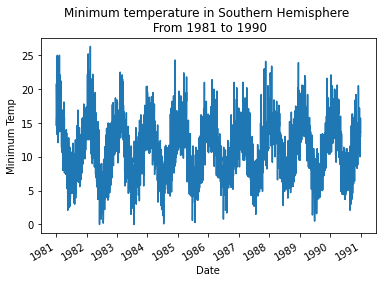

In [14]:
### Load required libraries

import    pandas           as pd
import  matplotlib.pyplot  as plt

### Read the time series data

series   =  pd.read_csv('D:/daily-minimum-temperatures.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

series.plot()
plt.ylabel('Minimum Temp')
plt.title('Minimum temperature in Southern Hemisphere \n From 1981 to 1990')
plt.show()


### The above plot shows a strong seasonality component.

We can draw a boxplot to check the variation across months in a year (1990).
It appears that we have a seasonal component each year showing swing from summer to winter.

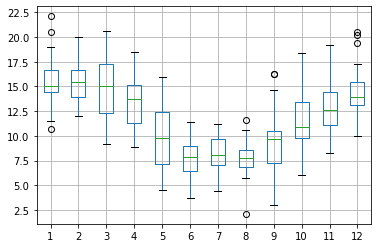

In [15]:
months         = DataFrame()
one_year       = series['1990'] 
groups         = one_year.groupby(Grouper(freq='M')) 
months         = concat([DataFrame(x[1].values) for x in groups], axis=1) 
months         = DataFrame(months) 
months.columns = range(1,13) 
months.boxplot() 
plt.show()

This plot shows the signiﬁcant change in distribution of minimum temperatures across the months of the year from the Southern Hemisphere summer in January to the Southern Hemisphere winter in the middle of the year, and back to summer again.

We group the Minimum Daily Temperatures dataset by years. A box and whisker plot is then created for each year and lined up side-by-side for direct comparison.

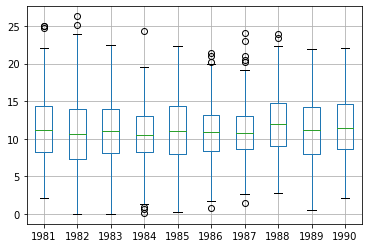

In [16]:
groups = series.groupby(Grouper(freq='A')) 
years  = DataFrame() 
for name, group in groups: 
    years[name.year] = group.values 
years.boxplot() 
plt.show()

We do not observe much year-by-year variation.

### Example 5

Read Tractor Sales Series


In [17]:
Tractor = pd.read_csv("D:/TractorSales.csv")
Tractor.head(5)

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


In [18]:
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(Tractor))
#MS stands for month start frequency

In [19]:
import calendar
Tractor['Month'] = dates.month
Tractor['Month'] = Tractor['Month'].apply(lambda x: calendar.month_abbr[x])
Tractor['Year'] = dates.year

In [20]:
#Tractor.drop(['Month-Year'], axis=1, inplace=True)
Tractor.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
Tractor = Tractor[['Month', 'Year', 'Tractor-Sales']]

In [21]:
Tractor.set_index(dates, inplace=True)

In [22]:
Tractor = Tractor[['Tractor-Sales']]
Tractor.head(5)

,Tractor-Sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203


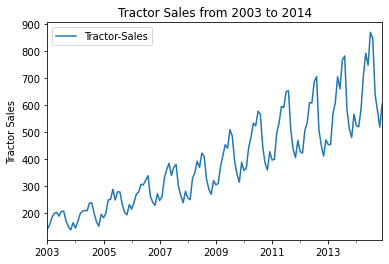

In [23]:
Tractor.plot()
plt.ylabel('Tractor Sales')
plt.title("Tractor Sales from 2003 to 2014")
plt.show()


The above plot shows a seasonality as well as a trend component.

In [24]:
Tractor['2003']

,Tractor-Sales
2003-01-01,141
2003-02-01,157
2003-03-01,185
2003-04-01,199
2003-05-01,203
2003-06-01,189
2003-07-01,207
2003-08-01,207
2003-09-01,171
2003-10-01,150


# END